In [1]:
# Cell 1: Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from datetime import datetime

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

# Download required NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print("✅ All libraries imported successfully!")

[nltk_data] Downloading package punkt to /home/enoch/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/enoch/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/enoch/nltk_data...


✅ All libraries imported successfully!


In [3]:
# Cell 2: Load and explore our cleaned data
df = pd.read_csv('data/bank_reviews_clean.csv')
print("📊 Dataset Overview:")
print(f"Total reviews: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few reviews:")
display(df.head())

print("\n📈 Bank-wise distribution:")
bank_counts = df['bank'].value_counts()
print(bank_counts)

print("\n⭐ Rating distribution:")
rating_counts = df['rating'].value_counts().sort_index()
print(rating_counts)

📊 Dataset Overview:
Total reviews: 9799
Columns: ['review_id', 'review_text', 'rating', 'date', 'bank', 'source']

First few reviews:


,review_id,review_text,rating,date,bank,source
0,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28,CBE,Google Play Store
1,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27,CBE,Google Play Store
2,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27,CBE,Google Play Store
3,c69f051a-00f8-4144-8423-b7ebcd328d2d,The app makes our life easier. Thank you CBE!,5,2025-11-27,CBE,Google Play Store
4,d2995fb9-63c6-4bfc-8d3c-93a0ee9dba8f,this app very bad 👎,1,2025-11-27,CBE,Google Play Store



📈 Bank-wise distribution:
bank
CBE       8113
BOA       1184
Dashen     502
Name: count, dtype: int64

⭐ Rating distribution:
rating
1    1744
2     395
3     604
4     944
5    6112
Name: count, dtype: int64


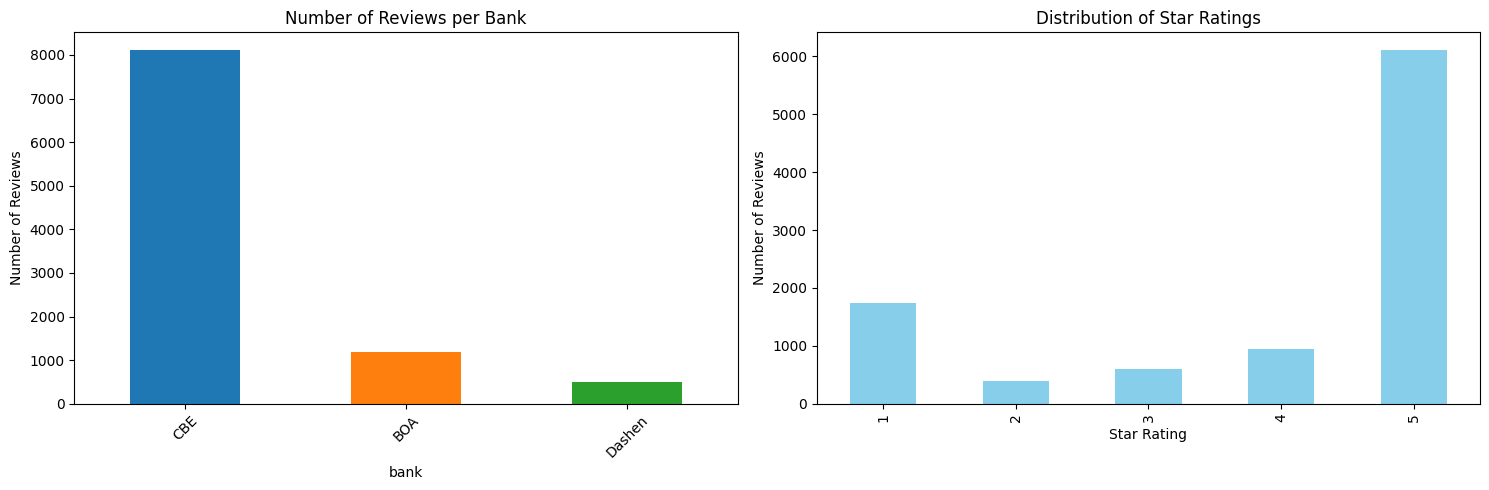

In [4]:
# Cell 3: Basic visualizations of our data
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Reviews per bank
bank_counts.plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('Number of Reviews per Bank')
axes[0].set_ylabel('Number of Reviews')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Rating distribution
rating_counts.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Distribution of Star Ratings')
axes[1].set_ylabel('Number of Reviews')
axes[1].set_xlabel('Star Rating')

plt.tight_layout()
plt.show()

In [5]:
# Cell 4: Simple Sentiment Analysis with TextBlob
print("🧠 Starting Sentiment Analysis with TextBlob...")

def get_sentiment(text):
    """Get sentiment polarity and label"""
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity
    
    if polarity > 0.1:
        return 'positive', polarity
    elif polarity < -0.1:
        return 'negative', polarity
    else:
        return 'neutral', polarity

# Apply sentiment analysis (this might take a minute)
df[['sentiment_label', 'sentiment_score']] = df['review_text'].apply(
    lambda x: pd.Series(get_sentiment(x))
)

print("✅ Sentiment analysis complete!")
print("\nSentiment Distribution:")
print(df['sentiment_label'].value_counts())

display(df[['review_text', 'rating', 'sentiment_label', 'sentiment_score']].head(10))

🧠 Starting Sentiment Analysis with TextBlob...
✅ Sentiment analysis complete!

Sentiment Distribution:
sentiment_label
positive    5704
neutral     3403
negative     692
Name: count, dtype: int64


,review_text,rating,sentiment_label,sentiment_score
0,good app,5,positive,0.700000
1,This application is very important and advanta...,5,positive,0.520000
2,why didn't work this app?,1,neutral,0.000000
3,The app makes our life easier. Thank you CBE!,5,neutral,0.000000
4,this app very bad 👎,1,negative,-0.910000
5,the most advanced app. but how to stay safe?,5,positive,0.466667
6,Good application,4,positive,0.700000
7,It is nice app,5,positive,0.600000
8,best,5,positive,1.000000
9,good app,5,positive,0.700000


📊 Sentiment Analysis Results


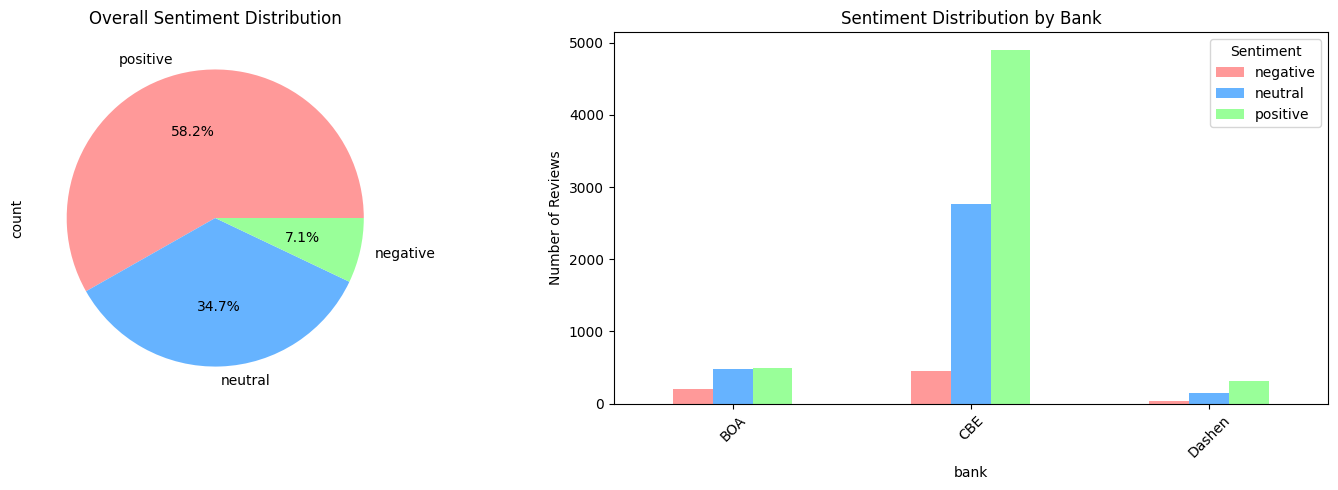


📈 Sentiment by Bank:


sentiment_label,negative,neutral,positive
bank,,,
BOA,207,484,493
CBE,451,2764,4898
Dashen,34,155,313


In [6]:
# Cell 5: Sentiment Analysis Results
print("📊 Sentiment Analysis Results")

# Overall sentiment
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Overall sentiment
sentiment_counts = df['sentiment_label'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']  # red, blue, green for neg, neutral, pos
sentiment_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', colors=colors)
axes[0].set_title('Overall Sentiment Distribution')

# Plot 2: Sentiment by bank
sentiment_by_bank = pd.crosstab(df['bank'], df['sentiment_label'])
sentiment_by_bank.plot(kind='bar', ax=axes[1], color=['#ff9999', '#66b3ff', '#99ff99'])
axes[1].set_title('Sentiment Distribution by Bank')
axes[1].set_ylabel('Number of Reviews')
axes[1].legend(title='Sentiment')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Detailed breakdown
print("\n📈 Sentiment by Bank:")
display(sentiment_by_bank)

🔍 Comparing Sentiment vs Star Ratings
Sentiment vs Star Ratings:


sentiment_label,negative,neutral,positive
rating,,,
1,491,876,377
2,74,192,129
3,43,257,304
4,28,275,641
5,56,1803,4253


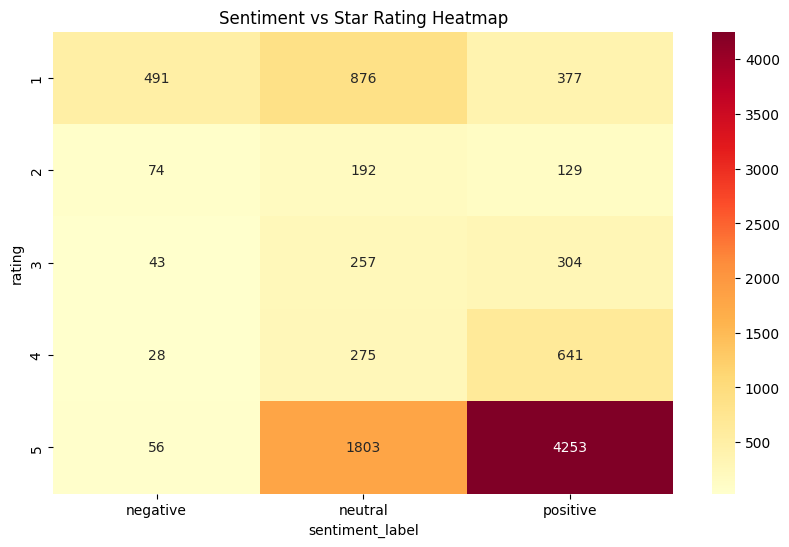


🤔 Insight: Rating 1 reviews with positive sentiment (sarcasm detection?)
Found 377 cases of 1-star reviews with positive sentiment


,review_text,sentiment_score
36,"fast and convenient app, thanks for your dedic...",0.366667
70,the app constantly glitches and won't stop loa...,0.222222
78,this is absolute trash why because it's not Wo...,0.181481
92,Ok,0.500000
139,"it says ""ti is work any more in your device"" w...",0.500000


In [7]:
# Cell 6: Compare Sentiment vs Star Ratings
print("🔍 Comparing Sentiment vs Star Ratings")

# Create a cross-tab
sentiment_vs_rating = pd.crosstab(df['rating'], df['sentiment_label'])
print("Sentiment vs Star Ratings:")
display(sentiment_vs_rating)

plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_vs_rating, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Sentiment vs Star Rating Heatmap')
plt.show()

# Interesting insight: Do low star ratings always mean negative sentiment?
print("\n🤔 Insight: Rating 1 reviews with positive sentiment (sarcasm detection?)")
weird_cases = df[(df['rating'] == 1) & (df['sentiment_label'] == 'positive')]
print(f"Found {len(weird_cases)} cases of 1-star reviews with positive sentiment")
if len(weird_cases) > 0:
    display(weird_cases[['review_text', 'sentiment_score']].head())

In [9]:
# Cell 7a: Download required NLTK data
print("📥 Downloading NLTK resources...")

import nltk
try:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('punkt_tab')  # This is the missing resource
    print("✅ NLTK resources downloaded successfully!")
except Exception as e:
    print(f"⚠️  NLTK download issue: {e}")

📥 Downloading NLTK resources...


[nltk_data] Downloading package punkt to /home/enoch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/enoch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/enoch/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/enoch/nltk_data...


✅ NLTK resources downloaded successfully!


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [10]:
# Cell 7: Simplified Text Preprocessing for Thematic Analysis
print("🔧 Preprocessing text for thematic analysis...")

import re
from nltk.corpus import stopwords

# Initialize with error handling
try:
    stop_words = set(stopwords.words('english'))
    print("✅ Stopwords loaded successfully")
except:
    print("⚠️  Using basic stopwords list")
    stop_words = set(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", 
                     "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 
                     'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
                     'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 
                     'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 
                     'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
                     'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 
                     'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 
                     'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once'])

def simple_preprocess(text):
    """
    Simplified text preprocessing that's more robust
    """
    if pd.isna(text):
        return ""
    
    text = str(text).lower()
    
    # Remove special characters and digits (keep only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Simple tokenization by splitting (more reliable than word_tokenize)
    tokens = text.split()
    
    # Remove stopwords and short tokens
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    
    return ' '.join(tokens)

# Apply preprocessing with progress indication
print("Processing reviews... (this may take a minute)")
df['cleaned_text'] = df['review_text'].apply(simple_preprocess)

print("✅ Text preprocessing complete!")
print(f"Sample of original vs cleaned text:")
sample_df = df[['review_text', 'cleaned_text']].head(3)
for idx, row in sample_df.iterrows():
    print(f"\nOriginal: {row['review_text'][:80]}...")
    print(f"Cleaned:  {row['cleaned_text'][:80]}...")

🔧 Preprocessing text for thematic analysis...
✅ Stopwords loaded successfully
Processing reviews... (this may take a minute)
✅ Text preprocessing complete!
Sample of original vs cleaned text:

Original: good app...
Cleaned:  good app...

Original: This application is very important and advantage for transfer of money and finan...
Cleaned:  application important advantage transfer money finance coutry foriegn country...

Original: why didn't work this app?...
Cleaned:  work app...


In [11]:
# Cell 8: Keyword Extraction using TF-IDF
print("🔑 Extracting important keywords...")

def extract_keywords_by_group(texts, max_features=20):
    """Extract top keywords using TF-IDF"""
    tfidf = TfidfVectorizer(max_features=max_features, stop_words='english')
    tfidf_matrix = tfidf.fit_transform(texts)
    feature_names = tfidf.get_feature_names_out()
    return feature_names

# Extract keywords for each bank
print("Top keywords by bank:")
for bank in df['bank'].unique():
    bank_texts = df[df['bank'] == bank]['cleaned_text']
    keywords = extract_keywords_by_group(bank_texts)
    print(f"\n🏦 {bank}: {', '.join(keywords)}")

# Extract keywords by sentiment
print("\nTop keywords by sentiment:")
for sentiment in df['sentiment_label'].unique():
    sentiment_texts = df[df['sentiment_label'] == sentiment]['cleaned_text']
    keywords = extract_keywords_by_group(sentiment_texts)
    print(f"\n😊 {sentiment}: {', '.join(keywords)}")

🔑 Extracting important keywords...
Top keywords by bank:

🏦 CBE: account, app, application, bank, banking, best, cbe, easy, good, great, like, money, nice, service, time, transaction, update, use, work, working

🏦 BOA: app, application, bank, banking, best, boa, developer, fix, good, like, mobile, money, nice, time, update, use, version, work, working, worst

🏦 Dashen: account, amole, app, application, bank, banking, best, dashen, easy, fast, good, like, mobile, nice, simple, time, transfer, update, use, work

Top keywords by sentiment:

😊 positive: app, application, bank, banking, best, better, cbe, easy, excellent, fast, good, great, like, mobile, nice, service, time, update, use, work

😊 neutral: account, app, application, bank, banking, cbe, fix, like, mobile, money, problem, thank, time, transaction, transfer, update, use, work, working, wow

😊 negative: account, app, application, bad, bank, banking, cbe, mobile, money, poor, service, slow, time, transaction, transfer, update, use

☁️ Generating Word Clouds...


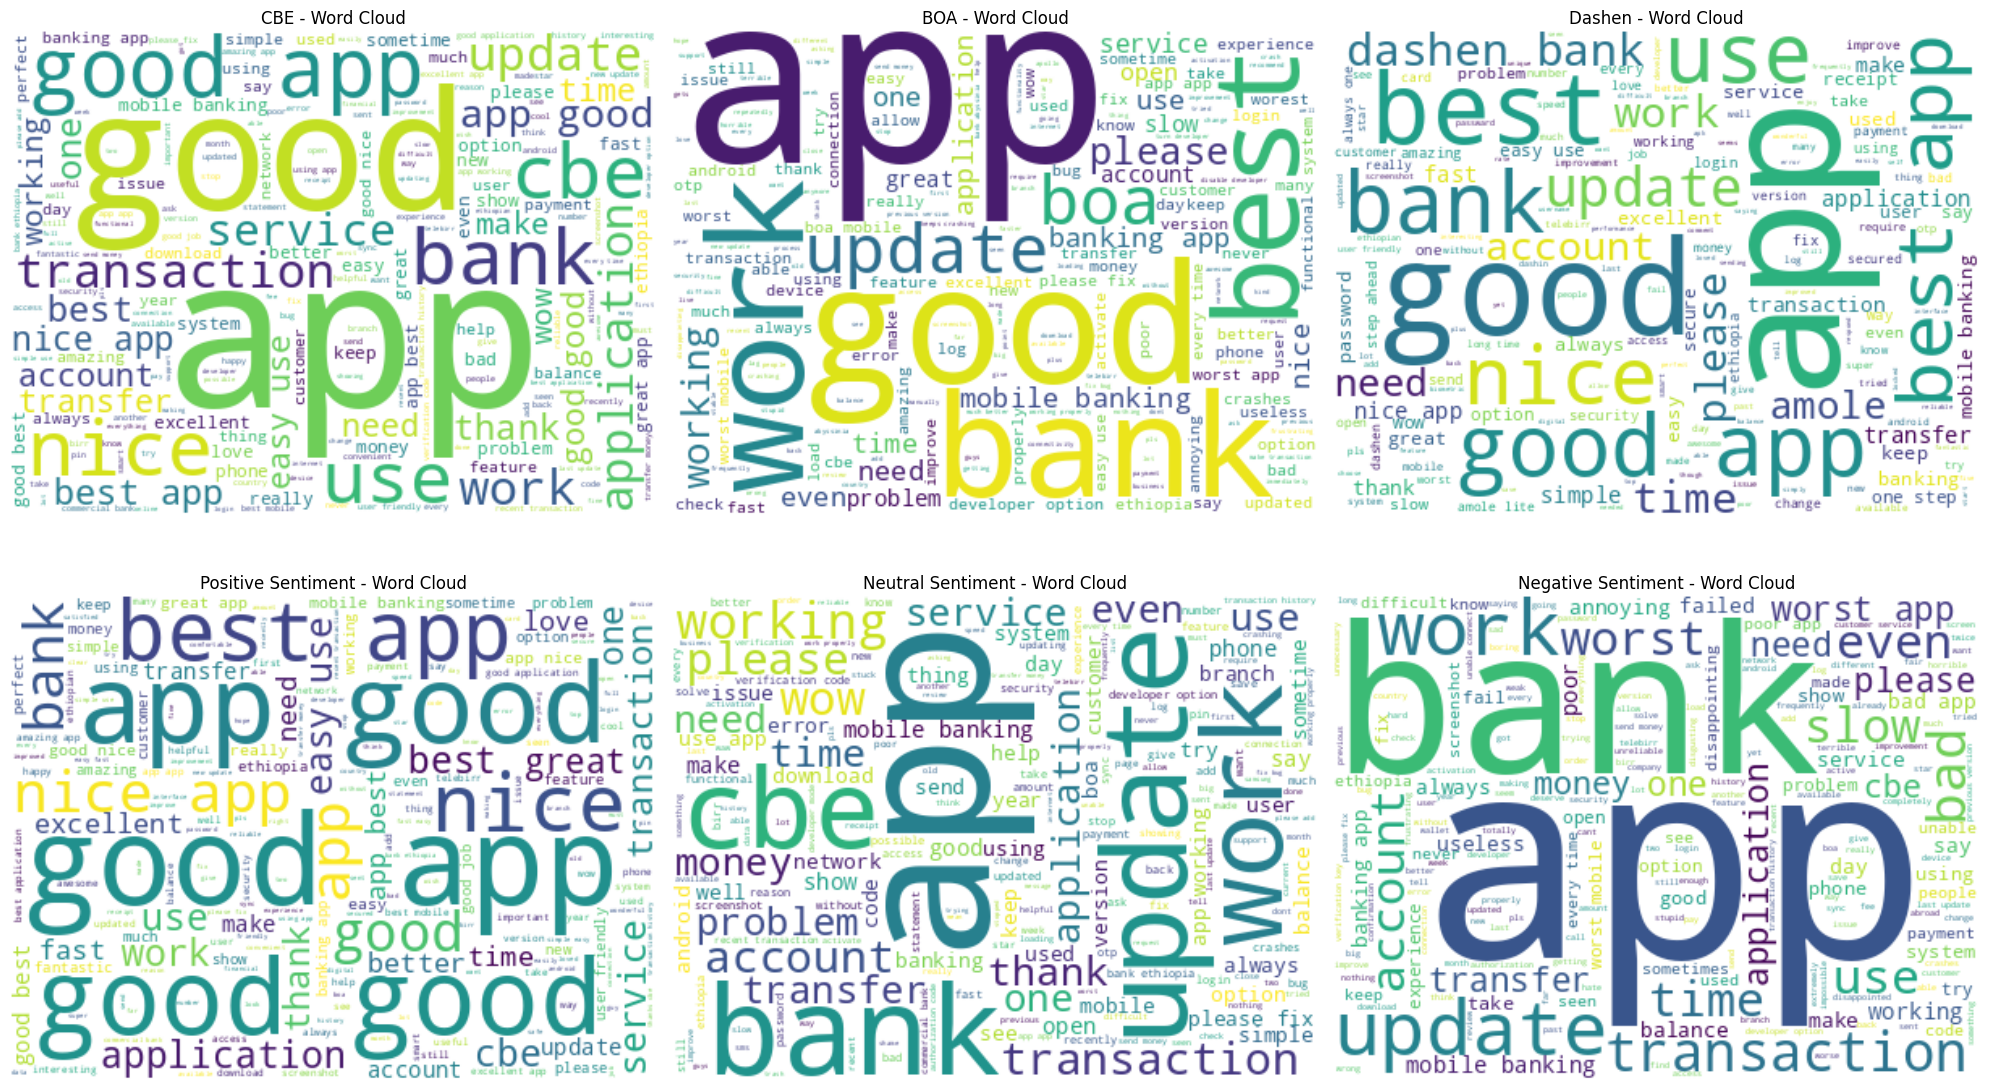

In [12]:
# Cell 9: Word Clouds for Visualization
print("☁️ Generating Word Clouds...")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Word clouds for each bank
for i, bank in enumerate(df['bank'].unique()):
    bank_text = ' '.join(df[df['bank'] == bank]['cleaned_text'])
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(bank_text)
    axes[0, i].imshow(wordcloud, interpolation='bilinear')
    axes[0, i].set_title(f'{bank} - Word Cloud')
    axes[0, i].axis('off')

# Word clouds for each sentiment
for i, sentiment in enumerate(df['sentiment_label'].unique()):
    sentiment_text = ' '.join(df[df['sentiment_label'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(sentiment_text)
    axes[1, i].imshow(wordcloud, interpolation='bilinear')
    axes[1, i].set_title(f'{sentiment.capitalize()} Sentiment - Word Cloud')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [13]:
# Cell 10: Manual Theme Identification
print("🎯 Identifying Key Themes from Keywords")

# Based on our keyword analysis, let's define themes
themes = {
    'Account Access': ['login', 'password', 'account', 'access', 'verify'],
    'Transaction Issues': ['transfer', 'transaction', 'money', 'payment', 'failed'],
    'App Performance': ['slow', 'crash', 'update', 'loading', 'speed'],
    'User Interface': ['interface', 'design', 'easy', 'navigation', 'layout'],
    'Customer Support': ['support', 'help', 'service', 'response', 'contact'],
    'Features': ['feature', 'function', 'option', 'missing', 'add']
}

def identify_themes(text, themes):
    """Identify which themes are mentioned in text"""
    text_lower = text.lower()
    found_themes = []
    for theme, keywords in themes.items():
        if any(keyword in text_lower for keyword in keywords):
            found_themes.append(theme)
    return ', '.join(found_themes) if found_themes else 'Other'

# Apply theme identification
df['themes'] = df['cleaned_text'].apply(lambda x: identify_themes(x, themes))

print("✅ Theme identification complete!")
print("\nTheme Distribution:")
theme_counts = df['themes'].value_counts()
print(theme_counts.head(10))

# Show examples
print("\n📝 Examples of themed reviews:")
for theme in list(themes.keys())[:3]:
    theme_examples = df[df['themes'].str.contains(theme)].head(2)
    print(f"\n{theme}:")
    for _, row in theme_examples.iterrows():
        print(f"  - {row['review_text'][:100]}...")

🎯 Identifying Key Themes from Keywords
✅ Theme identification complete!

Theme Distribution:
themes
Other                                  7391
App Performance                         408
Transaction Issues                      358
User Interface                          340
Customer Support                        295
Features                                186
Account Access                          120
Transaction Issues, App Performance      84
Account Access, Transaction Issues       74
Transaction Issues, Features             68
Name: count, dtype: int64

📝 Examples of themed reviews:

Account Access:
  - it suddenly asked me to enter the verification key I received. and it (*get your verification key fr...
  - ጥሩ App ነዉ ። የኔ የግል አስተያየት- Update ወይንም cache cleaning app ሲደረግ ለምንድነዉ ደግመን login ስናደርግ Restricted ሚያ...

Transaction Issues:
  - This application is very important and advantage for transfer of money and finance in the coutry and...
  - why we can't send money to other peop

In [18]:
# Cell 11: Save Results for Task 2 - FIXED PATH
print("💾 Saving analysis results...")

# Save the analyzed data with sentiment and themes
output_columns = [
    'review_id', 'review_text', 'rating', 'date', 'bank', 'source',
    'sentiment_label', 'sentiment_score', 'themes'
]

# FIXED: Remove the ../ from the path
df[output_columns].to_csv('data/bank_reviews_analyzed.csv', index=False)

print("✅ Analysis results saved to 'data/bank_reviews_analyzed.csv'")
print(f"Final analyzed dataset: {len(df)} reviews")

# Final summary with CORRECT bank counts
print("\n🎉 TASK 2 COMPLETED SUMMARY:")
print(f"• Analyzed sentiment for {len(df)} reviews")
print(f"• Bank distribution: CBE ({len(df[df['bank']=='CBE'])}), BOA ({len(df[df['bank']=='BOA'])}), Dashen ({len(df[df['bank']=='Dashen'])})")
print(f"• Sentiment: Positive ({len(df[df['sentiment_label']=='positive'])}), Negative ({len(df[df['sentiment_label']=='negative'])}), Neutral ({len(df[df['sentiment_label']=='neutral'])})")
print(f"• Identified {len(df['themes'].unique())} different theme combinations")
print(f"• Saved complete analysis for Task 3 database storage")

print("\n📊 Final Bank-wise Sentiment:")
sentiment_summary = pd.crosstab(df['bank'], df['sentiment_label'])
print(sentiment_summary)


💾 Saving analysis results...
✅ Analysis results saved to 'data/bank_reviews_analyzed.csv'
Final analyzed dataset: 9799 reviews

🎉 TASK 2 COMPLETED SUMMARY:
• Analyzed sentiment for 9799 reviews
• Bank distribution: CBE (8113), BOA (1184), Dashen (502)
• Sentiment: Positive (5704), Negative (692), Neutral (3403)
• Identified 55 different theme combinations
• Saved complete analysis for Task 3 database storage

📊 Final Bank-wise Sentiment:
sentiment_label  negative  neutral  positive
bank                                        
BOA                   207      484       493
CBE                   451     2764      4898
Dashen                 34      155       313


In [19]:
# Cell 12: Verify the saved file
import os

print("🔍 Verifying saved file...")
if os.path.exists('data/bank_reviews_analyzed.csv'):
    file_size = os.path.getsize('data/bank_reviews_analyzed.csv') / 1024 / 1024
    print(f"✅ File created successfully! Size: {file_size:.2f} MB")
    
    # Check the content
    verify_df = pd.read_csv('data/bank_reviews_analyzed.csv')
    print(f"✅ File contains {len(verify_df)} reviews")
    print(f"✅ Columns: {verify_df.columns.tolist()}")
    
    print("\n📈 Final verified bank distribution:")
    print(verify_df['bank'].value_counts())
else:
    print("❌ File was not created")
    

🔍 Verifying saved file...
✅ File created successfully! Size: 1.39 MB
✅ File contains 9799 reviews
✅ Columns: ['review_id', 'review_text', 'rating', 'date', 'bank', 'source', 'sentiment_label', 'sentiment_score', 'themes']

📈 Final verified bank distribution:
bank
CBE       8113
BOA       1184
Dashen     502
Name: count, dtype: int64


In [17]:
# DEBUG: Check why all banks show as CBE
print("🔍 DEBUG: Checking bank name issue...")
print("Unique bank names in dataset:")
print(df['bank'].unique())
print("\nBank value counts:")
print(df['bank'].value_counts())

# Check the original app names
if 'app_name' in df.columns:
    print("\nOriginal app names:")
    print(df['app_name'].value_counts())
else:
    print("\n'app_name' column not found - checking available columns:")
    print(df.columns.tolist())

🔍 DEBUG: Checking bank name issue...
Unique bank names in dataset:
['CBE' 'BOA' 'Dashen']

Bank value counts:
bank
CBE       8113
BOA       1184
Dashen     502
Name: count, dtype: int64

'app_name' column not found - checking available columns:
['review_id', 'review_text', 'rating', 'date', 'bank', 'source', 'sentiment_label', 'sentiment_score', 'cleaned_text', 'themes']


In [21]:
# Cell 13: Sample Table Inspection
print("📋 SAMPLE DATA INSPECTION")
print("=" * 80)

# Create a sample that includes all banks and sentiments
sample_size = 15  # Show 5 from each bank
sample_df = pd.DataFrame()

for bank in df['bank'].unique():
    bank_samples = df[df['bank'] == bank].sample(5, random_state=42)
    sample_df = pd.concat([sample_df, bank_samples])

# Reset index for cleaner display
sample_df = sample_df.reset_index(drop=True)

# Display key columns in a nice format
display_columns = ['bank', 'rating', 'sentiment_label', 'sentiment_score', 'themes', 'review_text']

print(f"Showing {len(sample_df)} sample reviews (5 from each bank):")
display(sample_df[display_columns].head(15))

# Add some analysis on the sample
print("\n🔍 SAMPLE ANALYSIS:")
print("Rating vs Sentiment in sample:")
sample_crosstab = pd.crosstab(sample_df['rating'], sample_df['sentiment_label'])
print(sample_crosstab)

print("\nThemes distribution in sample:")
print(sample_df['themes'].value_counts().head(10))

📋 SAMPLE DATA INSPECTION
Showing 15 sample reviews (5 from each bank):


,bank,rating,sentiment_label,sentiment_score,themes,review_text
0,CBE,5,positive,0.500000,Other,Ok
1,CBE,5,neutral,0.000000,Other,congra ethio
2,CBE,5,positive,0.600000,Other,Nice
3,CBE,5,positive,1.000000,Other,Best Banking system
4,CBE,1,neutral,0.000000,App Performance,Doesn't work after update
5,BOA,1,neutral,-0.060000,"Account Access, Transaction Issues",Very unprofessional and mischievous bank in my...
6,BOA,1,negative,-0.333333,Other,"Ultimately, the worst mobile banking experienc..."
7,BOA,1,positive,0.700000,Transaction Issues,App good. how money transfer tele birr agents
8,BOA,5,positive,0.800000,Other,great 👍
9,BOA,5,neutral,0.000000,Other,Muhammaadamaan musxafaa



🔍 SAMPLE ANALYSIS:
Rating vs Sentiment in sample:
sentiment_label  negative  neutral  positive
rating                                      
1                       1        2         1
5                       0        3         8

Themes distribution in sample:
themes
Other                                 11
App Performance                        1
Account Access, Transaction Issues     1
Transaction Issues                     1
Features                               1
Name: count, dtype: int64
